# Homework 4
PSY4219/6129 Fall 2022

**Due Monday October 3 at 11:59pm**

**20 points**

This assignment can be done within this Jupyter notebook (.ipynb), please 
rename the notebook with your name before submitting it.

**<u>Please do not</u>** turn in the `difdata.csv` file with your homework 
(for Q2).

Please make sure you comment in your code and please use good programming style 
(especially points emphasized in class).

*Unexcused late assignments will be penalized 10% for every 24 hours late, 
starting from the time class ends, for a maximum of two days, after which they 
will earn a 0.*

***
## Q1 
Using the code from Homework 3* for generating the $HDR(t)$ function, I want 
you to save that $HDR(t)$ function as a CSV file (using techniques from class), 
then load it back in, and redisplay the function using the information saved in 
the file (pasting in the code you wrote for the last assignment, but using the 
information loaded in from the file).

Your CSV file should have the following structure:
* 1st line should be an informative note (< 50 characters) about what the file 
    contains.
* 2nd line is the <u>number of time steps</u> in $HDR(t)$.
* 3rd line should be the <u>names</u> of the parameters of the $HDR$ (from 
    Homeworks 2 and 3), separated by commas.
* 4th line should be the <u>values</u> of the parameters (from Homeworks 1 and 
    2), separated by commas.

The remaining lines should be each value of $t$ and its corresponding $HDR(t)$, 
separated by commas (in other words, if you had 1000 values of $t$ and $HDR(t)$
in your numpy arrays, these should be 1000 lines in the CSV file).

**If you were unable to get your Homework 3 code to work, email the TA and we will supply code for you to use for this assignment.*
### (a) (4 points)
Save the file (write) as a CSV (using the structure described above).

In [1]:
import csv
import numpy as np
import math

In [2]:
#### TODO: Create and save a CSV using the structure described above ####

t = np.linspace(0, 50, 1000).reshape(1000,1)

# Create the first four lines of the csv file
info_note = ['This file contains the HDR(t) function.']
num_timesteps = [len(t)]
para_name = ['alpha1', 'beta1', 'alpha2', 'beta2', 'w']
para_val = np.array([6., 1., 16., 1., 5/6])

# Create the remaining lines of the csv file
alpha1 = 6.
beta1 = 1.
alpha2 = 16.
beta2 = 1.
w = 5/6

HDR_vector = (w * ((beta1 ** alpha1) * (t ** alpha1) * np.exp(-t * beta1) / math.gamma(alpha1))
           - (1 - w) * ((beta2 ** alpha2) * (t ** alpha2) * np.exp(-t * beta2) / math.gamma(alpha2)))

HDR_fct = np.hstack((t, HDR_vector.reshape(1000,1)))

with open('HDR.csv', 'w', newline='') as fp:
    csvwriter = csv.writer(fp)
    csvwriter.writerow(info_note) 
    csvwriter.writerow(num_timesteps)
    csvwriter.writerow(para_name)
    csvwriter.writerow(para_val) 
    csvwriter.writerows(HDR_fct) 

### (b) (4 points)
Open the CSV file and load (read) its content into variables (for the number of 
time steps and the HDR parameters) and a numpy arrays for $t$ and $HDR(t)$. 
Using your code from Q2 of Homework 3, display a plot of $HDR(t)$ values as a 
function of $t$ (to demonstrate that what you saved to the file and read in 
from the file is the same as what you started with).

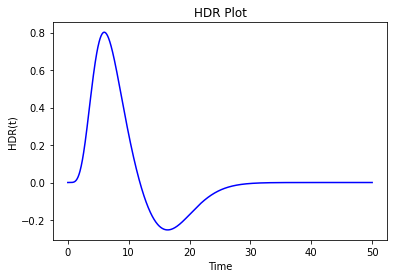

In [3]:
#### TODO: Load the csv you just created, assign its values to variables, and 
# display a plot of HDR values as a function of t ####
import matplotlib.pyplot as plt

with open('HDR.csv', 'r') as fp:
    csvreader = csv.reader(fp, delimiter=',')
    info_note = next(csvreader)
    num_timesteps = next(csvreader)
    para_name = next(csvreader)
    para_val = next(csvreader)
    
    t_len = HDR_fct.shape[0]
    t_new = np.zeros(t_len,)
    HDR_vector_new = np.zeros(t_len,)
    for i, row in enumerate(csvreader):
        t_new[i] = float(row[0])
        HDR_vector_new[i] = float(row[1])

plt.plot(t_new, HDR_vector_new, 'b-')
plt.xlabel('Time')
plt.ylabel('HDR(t)')
plt.title("HDR Plot")
plt.show()

***
## Q2 
In class, we went over code for reading the data file `difdata.csv`. Here is 
example code that does that:

In [4]:
with open('./difdata.csv', 'r') as fp:
    csvreader = csv.reader(fp, delimiter=',')

    row = next(csvreader)
    Ntrials = int(row[0])
    
    icondition = np.zeros(Ntrials, dtype=int)
    ichoice = np.zeros(Ntrials, dtype=int)
    iRT = np.zeros(Ntrials, dtype=float)

    for i, row in enumerate(csvreader):
        icondition[i] = int(row[1])
        ichoice[i] = int(row[2])
        iRT[i]  = float(row[3])

Recall that this code parses the data file into `icondition`, a numpy array 
which holds the condition (1 or 2) on each trial, `ichoice`, a numpy array 
which holds the choice accuracy (0=error or 1=correct) on each trial, and 
`iRT`, a numpy array which holds the response time (RT) on each trial.

### (a) (6 points) 
Following the discussion from class, I want you to partition the data so that 
one two-dimensional array holds the choices in condition 1 and the choices in 
condition 2 and another two-dimensional array that holds the RTs in condition 1 
and the RTs in condition 2. **First**, do this using `for` loops. **Second**, 
do this using logical (Boolean) indexing. 

In [6]:
#### TODO: Using for loops, create a 2D array that holds the choices for each 
# condition and another 2D array that holds the RTs for each condition ####
with open('./difdata.csv', 'r') as fp:
    csvreader = csv.reader(fp, delimiter=',')

    row = next(csvreader)
    Ntrials = int(row[0])  
    
    choice = np.zeros((2, Ntrials), dtype=int)
    RT = np.zeros((2, Ntrials), dtype=float)

    a = 0
    b = 0
    for row in csvreader:
        if int(row[1]) == 1:
            choice[0,a] = int(row[2])
            RT[0,a] = row[3]
            a += 1
        elif int(row[1]) == 2:
            choice[1,b] = int(row[2])
            RT[1,b] = row[3]
            b += 1
    print(choice[:,:20])
    print(RT[:,:20])

[[0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1]]
[[0.51  1.28  0.372 0.643 0.446 0.548 0.343 0.736 0.618 1.013 0.456 0.616
  0.742 0.384 0.4   0.714 0.393 0.652 0.835 0.406]
 [0.361 0.411 0.344 0.622 0.563 0.995 0.561 0.432 0.367 0.682 0.412 0.389
  0.419 0.37  0.39  0.473 0.415 0.379 0.435 0.535]]


In [7]:
#### TODO: Using logical indexing, create a 2D array that holds the choices 
# for each condition and another 2D array that holds the RTs for each condition ####
with open('./difdata.csv', 'r') as fp:
    csvreader = csv.reader(fp, delimiter=',')
    
    choice1 = ichoice[((icondition % 2) == 1)]
    choice2 = ichoice[((icondition % 2) == 0)]
    choice = np.vstack((choice1, choice2))
    
    RT1 = iRT[((icondition % 2) == 1)]
    RT2 = iRT[((icondition % 2) == 0)]
    RT = np.vstack((RT1, RT2))
    print(choice[:,:20])
    print(RT[:,:20])

[[0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1]]
[[0.51  1.28  0.372 0.643 0.446 0.548 0.343 0.736 0.618 1.013 0.456 0.616
  0.742 0.384 0.4   0.714 0.393 0.652 0.835 0.406]
 [0.361 0.411 0.344 0.622 0.563 0.995 0.561 0.432 0.367 0.682 0.412 0.389
  0.419 0.37  0.39  0.473 0.415 0.379 0.435 0.535]]


### (b) (6 points) 
Following the discussion from class, I want you to remove “outliers” based on 
RT, in this case trials where RT is outside some bound (RT<0.100 or RT>1.000) 
are considered outliers. **First**, do this using `for` loops. **Second**, do 
this using logical (Boolean) indexing. Remember from discussion in class that 
here you will not be able to use a 2x500 numpy array because the number of 
resulting trials after removing outliers will be unequal (instead, use a list 
of numpy arrays).

In [9]:
lowerBound = .1
upperBound = 1

In [13]:
#### TODO: Using for loops, remove outliers based on RTs ####
with open('./difdata.csv', 'r') as fp:
    csvreader = csv.reader(fp, delimiter=',')

    row = next(csvreader)
    Ntrials = int(row[0])
    
    choice1 = np.zeros(1, dtype=int)
    choice2 = np.zeros(1, dtype=int)
    RT1 = np.zeros(1, dtype=float)
    RT2 = np.zeros(1, dtype=float)

    # Iterate through the dataset and filter out RT values out of bound
    a = 0
    b = 0
    for row in csvreader:
        if (int(row[1]) == 1 and (lowerBound <= float(row[3]) <= upperBound)):
            choice1 = np.hstack((choice1, int(row[2])))
            RT1 = np.hstack((RT1, float(row[3])))
            a += 1
        elif (int(row[1]) == 2 and (lowerBound <= float(row[3]) <= upperBound)):
            choice2 = np.hstack((choice2, int(row[2])))
            RT2 = np.hstack((RT2, float(row[3])))
            b += 1
            
    # Delete the first column of zero from the arrays
    choice1 = np.delete(choice1,0)
    choice2 = np.delete(choice2,0)
    RT1 = np.delete(RT1,0)
    RT2 = np.delete(RT2,0)
    
    # Create two lists of arrays that present the final result    
    choice_for_out = [choice1, choice2]
    RT_for_out = [RT1, RT2]
    print(choice_for_out[1][:20])
    print(RT_for_out[1][:20])

[1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1]
[0.361 0.411 0.344 0.622 0.563 0.995 0.561 0.432 0.367 0.682 0.412 0.389
 0.419 0.37  0.39  0.473 0.415 0.379 0.435 0.535]
(491,)


In [28]:
#### TODO: Using logical indexing, remove outliers based on RTs ####
with open('./difdata.csv', 'r') as fp:
    csvreader = csv.reader(fp, delimiter=',')
    
    choice1 = choice[0][(np.logical_and(lowerBound <= RT[0], RT[0] <= upperBound))]
    choice2 = choice[1][(np.logical_and(lowerBound <= RT[1], RT[1] <= upperBound))]
    
    RT1 = RT[0][(np.logical_and(lowerBound <= RT[0], RT[0] <= upperBound))]
    RT2 = RT[1][(np.logical_and(lowerBound <= RT[1], RT[1] <= upperBound))]
    
    # Create two lists of arrays that present the final result   
    choice_log_out = [choice1, choice2]
    RT_log_out = [RT1, RT2]
    print(choice_log_out[1][:20])

[1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1]
